In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
train, test = train_test_split(tips, random_state=442)

In [3]:
scaler = MinMaxScaler()
num_vars = list(train.select_dtypes('number').columns)

print('Scaling {}, and {}...'.format(', '.join(num_vars[:-1]), num_vars[-1]))
train[num_vars] = scaler.fit_transform(train[num_vars])

Scaling total_bill, tip, and size...


In [4]:
train.describe()

,total_bill,tip,size
count,183.00,183.00,183.00
mean,0.32,0.22,0.32
std,0.20,0.16,0.19
min,0.00,0.00,0.00
25%,0.17,0.11,0.20
50%,0.27,0.21,0.20
75%,0.41,0.28,0.40
max,1.00,1.00,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105f12e90>,
      dtype=object)

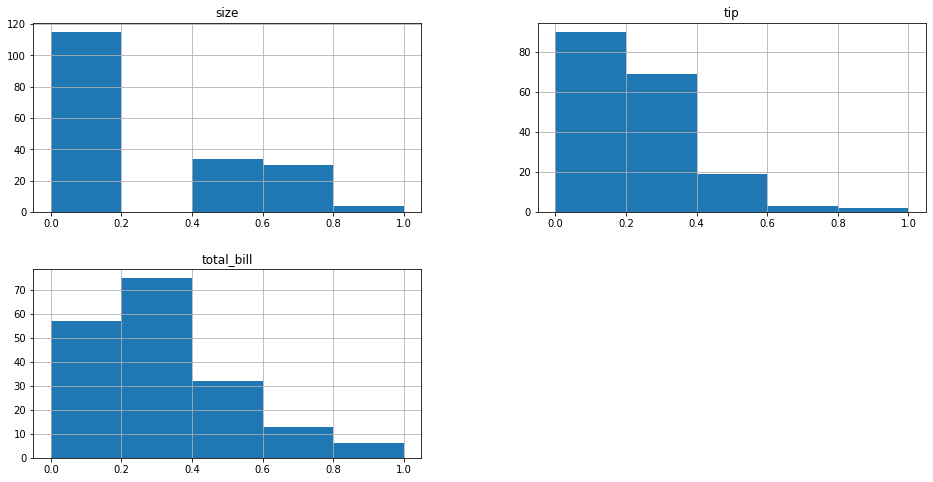

In [5]:
train.hist(figsize=(16, 8), bins=5, log=False)

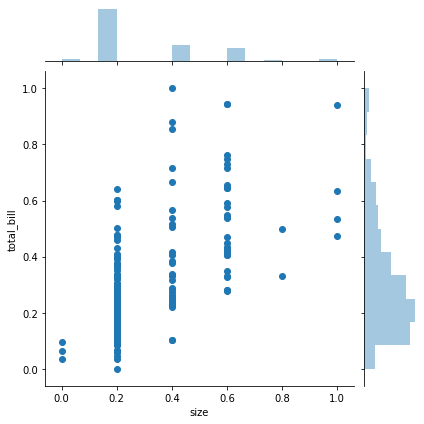

In [6]:
sns.jointplot(x='size', y='total_bill', data=train)

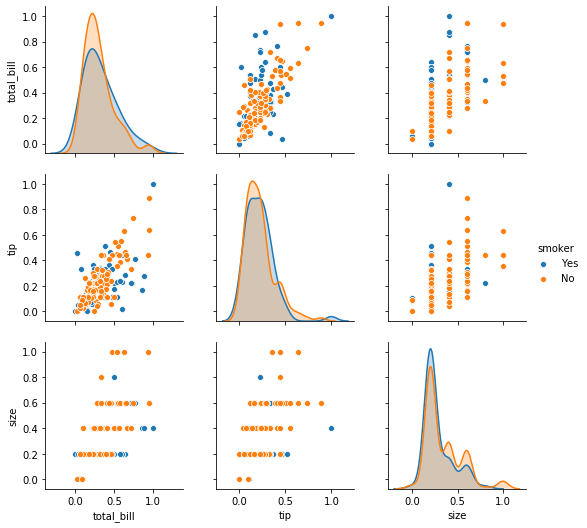

In [10]:
sns.pairplot(train, hue='smoker')

In [15]:
# t-test - smokers vs non-smokers
# H_0: smokers tip the same as non-smokers
# H_a: smokers tip more than non-smokers

alpha = 0.01

x1 = train[train.smoker == 'Yes'].tip
x2 = train[train.smoker == 'No'].tip

t, p = stats.ttest_ind(x1, x2)

p < alpha

False

In [ ]:
# P is not less than alpha, so fail to reject the null: smokers tip the same as non-smokers

In [17]:
# chi^2 test


chi2, p, degf, expected = stats.chi2_contingency(train[num_vars])


print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 15.1607
p     = 1.0000


In [ ]:
# Fail to reject the null